In [236]:
from tensorflow.keras.layers import Dense,Conv2D
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [237]:
df = pd.concat(map(pd.read_csv,['./lop71.csv','./lop72.csv']),ignore_index=True)
print(df)


     Ho_ten    10%  20%_1  20%_2   Thi
0    71_011  6.500  6.500   6.00  6.50
1    71_012  5.500  5.500   6.00  5.00
2    71_013  6.500  7.000   7.00  6.75
3    71_014  7.250  5.500   7.00  6.00
4    71_021  7.500  5.000   6.00  6.00
..      ...    ...    ...    ...   ...
148  72_151  7.375  6.500   7.50  7.00
149  72_152  7.250  6.750   7.00  7.00
150  72_153  7.125  6.750   6.75  7.00
151  72_154  7.750  6.375   7.50  7.00
152  72_155  7.875  6.125   6.75  7.00

[153 rows x 5 columns]


In [238]:
df.to_csv('./luyentap.csv',index=False)

C:\Users\fancyma\AppData\Local\Temp\ipykernel_17984\708539049.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


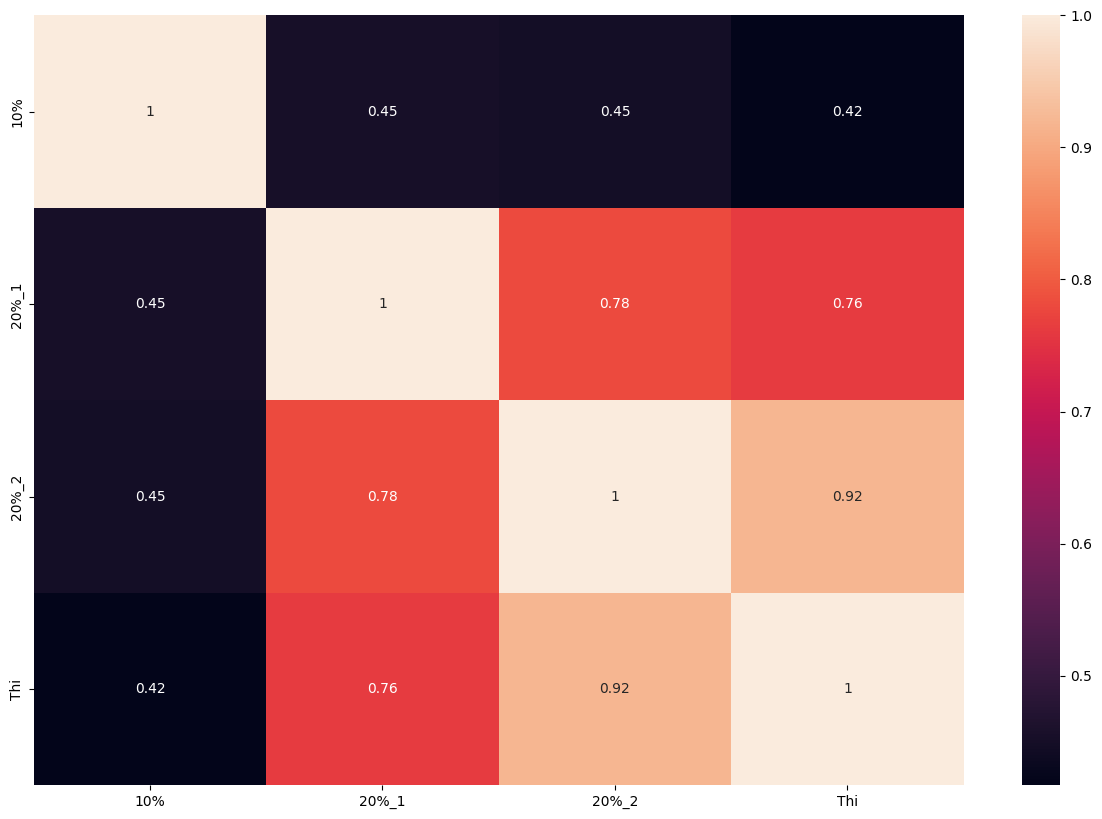

In [239]:
df = pd.read_csv('./luyentap.csv')
df = df.loc[df['10%'] >= 0]

df.fillna(df.mean(),inplace=True)
df.drop_duplicates(inplace=True)
# print(df)
df['10%'] = df['10%']*0.1
df['20%_1'] = df['20%_1'] * 0.2
df['20%_2'] = df['20%_2'] * 0.2
# print(df)
# df = pd.DataFrame({'10%':data10,'20%_1':data20_1,'20%_2':data20_2,'Thi':dataThi})
df['10%'] = (df['10%'] - df['10%'].min()) /(df['10%'].max() -df['10%'].min())
df['20%_1'] = (df['20%_1'] - df['20%_1'].min()) /(df['20%_1'].max()- df['20%_1'].min())
df['20%_2'] = (df['20%_2'] - df['20%_2'].min()) /(df['20%_2'].max()- df['20%_2'].min())

# print(df)
df.to_csv('./view.csv',index=True)

corr = df.corr()
import seaborn as sns
corr = pd.DataFrame(corr,columns=corr.keys(),index=corr.keys())
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True,ax=ax)
plt.show()

In [240]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=3))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam',loss='mse',metrics='mse')

        10%     20%_1     20%_2
0    0.6500  0.742857  0.666667
1    0.5500  0.628571  0.666667
2    0.6500  0.800000  0.777778
3    0.7250  0.628571  0.777778
4    0.7500  0.571429  0.666667
..      ...       ...       ...
148  0.7375  0.742857  0.833333
149  0.7250  0.771429  0.777778
150  0.7125  0.771429  0.750000
151  0.7750  0.728571  0.833333
152  0.7875  0.700000  0.750000

[151 rows x 3 columns]
Epoch 1/200
2/2 [==============================] - 1s 738ms/step - loss: 46.6780 - mse: 46.6780 - val_loss: 48.3460 - val_mse: 48.3460
Epoch 2/200
2/2 [==============================] - 0s 39ms/step - loss: 45.6638 - mse: 45.6638 - val_loss: 47.4136 - val_mse: 47.4136
Epoch 3/200
2/2 [==============================] - 0s 34ms/step - loss: 44.7947 - mse: 44.7947 - val_loss: 46.5501 - val_mse: 46.5501
Epoch 4/200
2/2 [==============================] - 0s 37ms/step - loss: 43.9986 - mse: 43.9986 - val_loss: 45.9264 - val_mse: 45.9264
Epoch 5/200
2/2 [==============================] - 0s 4

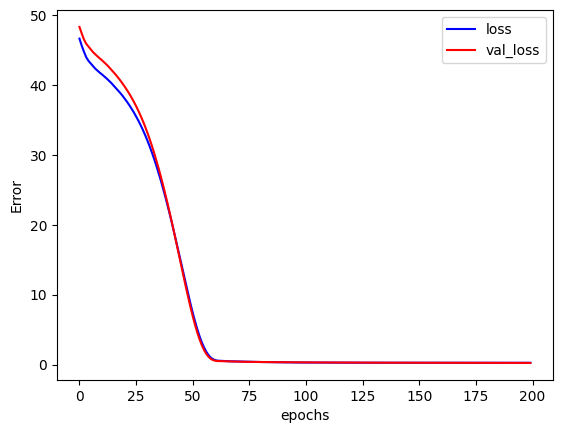

In [241]:
df = df.iloc[:,1:]
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]
print(X)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
X_test,X_val,Y_test,Y_val = train_test_split(X_test,Y_test,test_size = 0.5,random_state=1)

model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=200,batch_size=64)
model.save('model_.h5')

plt.plot(model.history.history['loss'],label='loss',color='blue')
plt.plot(model.history.history['val_loss'],label='val_loss',color='red')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [242]:
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

model = load_model('model_.h5')
yhat = model.predict([X_test])
print(r2_score(yhat,Y_test))


1/1 [==============================] - 0s 78ms/step
0.823595754880984


In [243]:
x = model.predict([[1,1,1]])
print(x)

1/1 [==============================] - 0s 82ms/step
[[8.645757]]
